<font size=3 color='blue'>
    
# <center> Tarea 1,  fecha de entrega: febrero 17 del 2023 </center> 

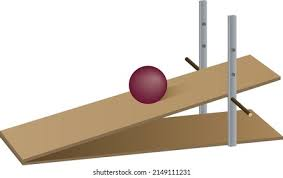

<font size=4>En esta tarea vamos a realizar el ajuste de parámetros para describir la naturaleza del plano inclinado, el cual, como físicos, sabemos que es un problema de **Movimiento Uniformemente Acelerado**. Dado un conjunto de muestras experimentales, pondrás a prueba  tu "intuición física", para determinar los valores apropiados de los pesos y el bias, para obtener el mínimo error posible dada una función F(X,$\vec{W}$, b) que propongas para describir el problema.

In [209]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de función para obtener los datos experimentales

In [210]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2/2 + error 
        
    return x, y

## Declaración de parámetros de entrada para describir el sistema

In [211]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


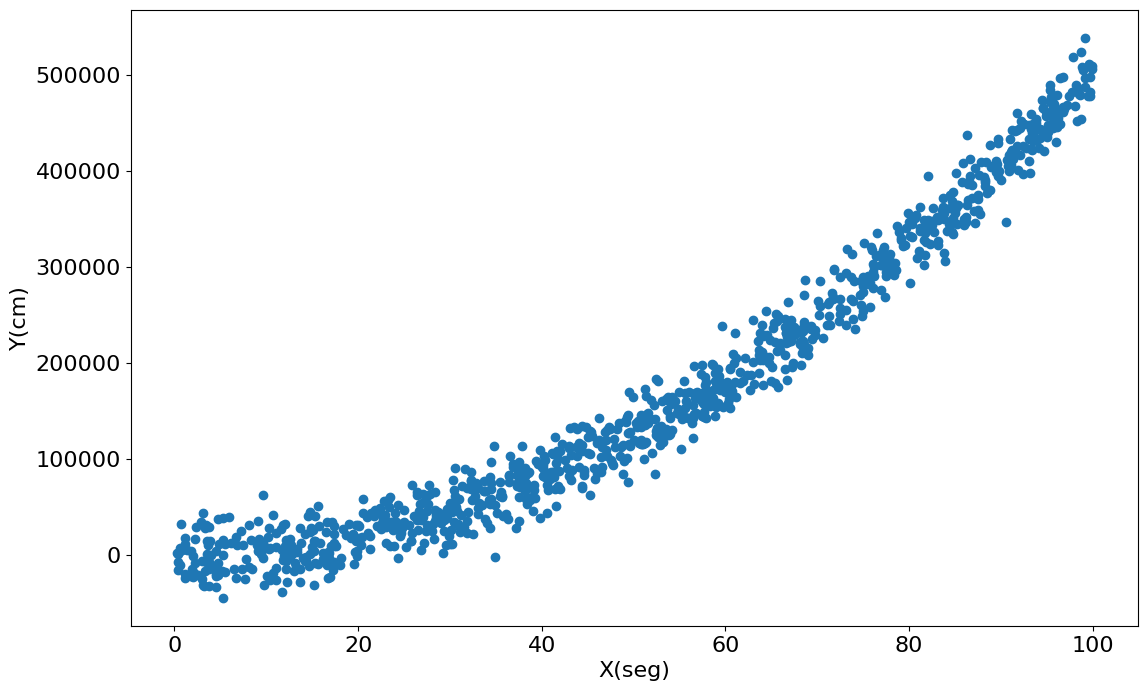

In [212]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=5 color='blue'>

Proponemos una función o mapeo que nos permita correlacionar los tiempos (X) con la distancia medida (Y)

$$
    F(x, W_0, W_1, b)=W_1x^2+W_0x+b
$$

<font size=4 color=red>Pregunta 1: Inicializa los valores para $W_1, W_0$ y $b$, de la manera en que tú mejor consideres. Recuerda que esto es un "guess" inicial.

In [213]:
#Initializing the parameter defining the function F

weight1_0 = 100.0
weight0_0= 100.0
bias_0 = 50.0

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las muestras

In [214]:
# Function for plotting (x,y) and (x,F(X,W,b))

def plot_x_y_y__(x, y, y_, points=True):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting samples
    plt.scatter(x, y)
    
    #Plotting function
    plt.scatter(x, y_, color='green', lw=4, label='F(X, W, b)')
    plt.legend()

    plt.show()

<font size=4 color=red>Pregunta 2: Utilizando la función señalada en la celda anterior, construye el arreglo de valores *y_*, los cuales representan los valores de tu función F(X,W,b). Luego, calcula el error cuadrático medio de dicho arreglo con los valores del experimento, *y*. Imprime el resultado y la gráfica

residuo: 52051872793.10


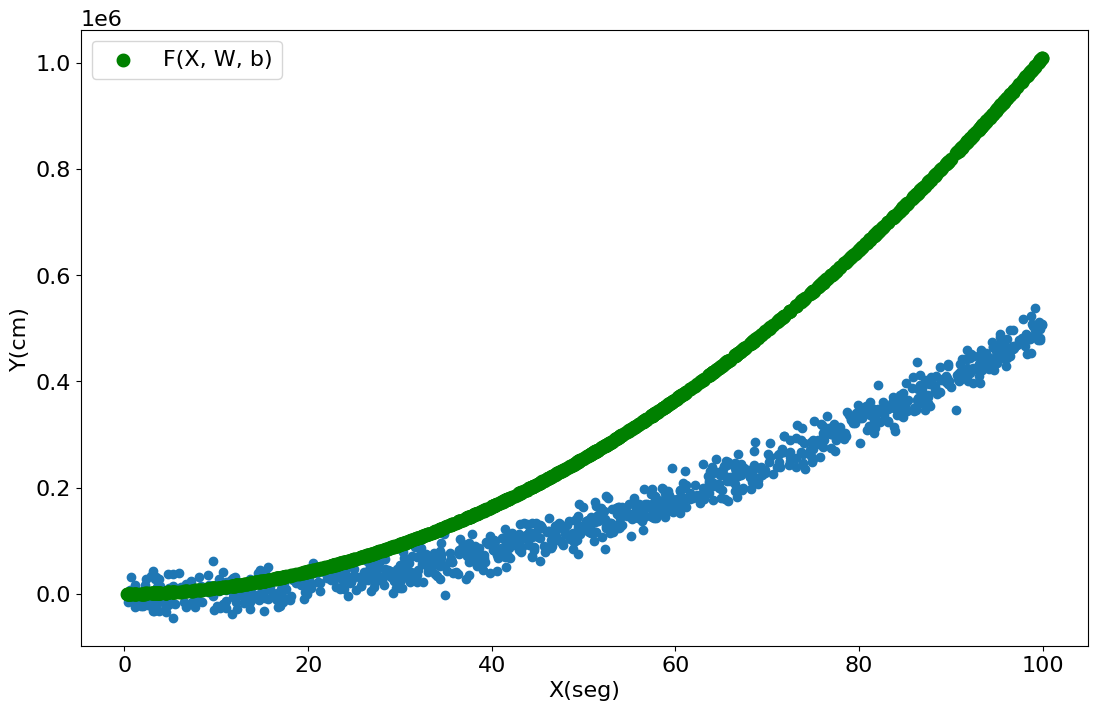

In [215]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)

y_ = weight1_0*x**2 + weight0_0*x + bias_0

# Using the function F, the residuos is calculated by comparing the calculated and measured values

residuo = np.mean((y-y_)**2)

print('residuo: {0:10.2f}'.format( residuo))

plot_x_y_y__(x, y, y_, points=True)

<font size=4 color=red>Pregunta 3: Define una función, que se llame **update_weights_biases**, la cual permita actualizar los parámetros $W_1, W_0$ y $b$, dando una delta $\Delta$ de cambio para cada uno de ellos. (HINT: Revisa la función que se definió en la clase 2. No la puedes copiar completamente; debes realizar ciertos ajutes a esa función para este nuevo problema)

In [216]:
def update_weights_biases(x, y, weight1, weight0, bias, delta_weight1, delta_weight0, delta_bias):
    
    weight1 = weight1 + delta_weight1
    
    weight0 = weight0 + delta_weight0
    
    bias = bias + delta_bias

    #The following date are for constructing the F(x,weight, bias)
    
    y_ = weight1*x**2 + weight0*x + bias
       
    mse = np.mean((y - y_)**2)
    
    #print('residuo: {:10.2f}'.format(residuo))   
        
    return weight1, weight0, bias, y_, mse

<font size=4 color=red>Pregunta 4: Realiza una gráfica, actualizando los valores de los pesos y los bias, con el delta de cambio que tú consideres, para los 3 parámetros involucrados. Utiliza la función *plot_x_y_y__* para mostrar el resultado

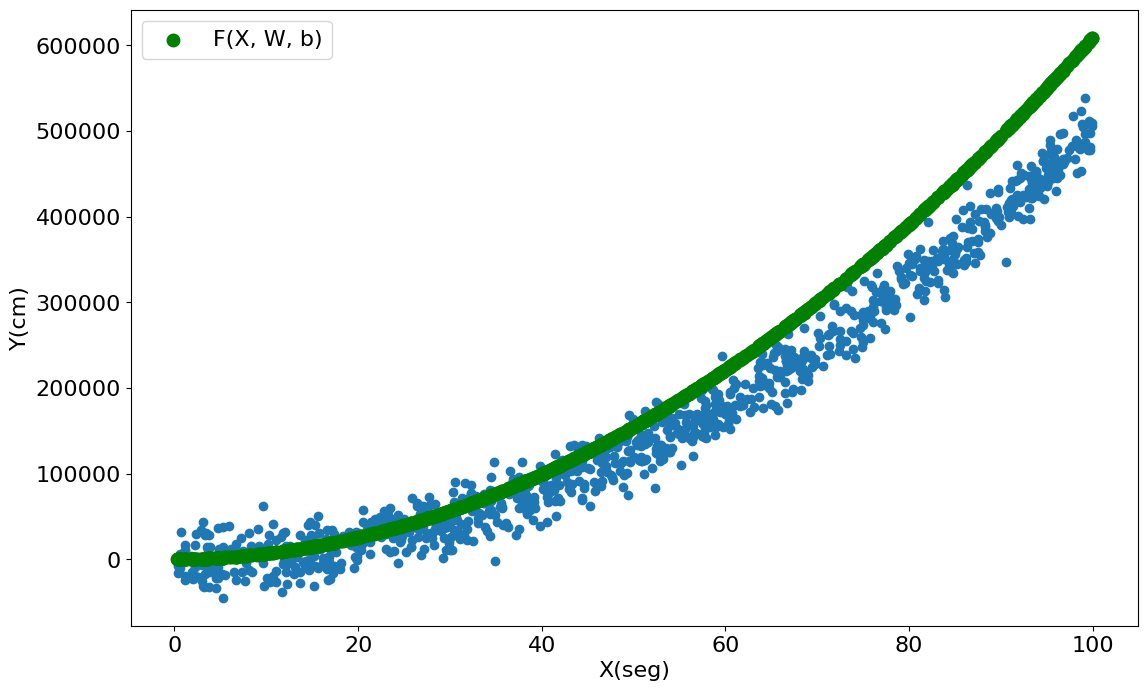

In [217]:
weight1 = weight1_0
weight0 = weight0_0
bias = bias_0
delta_w1 = -40.0
delta_w0 = -7.0
delta_b = -250.0

weight1, weight0, bias, y_, mse = update_weights_biases(x, y , weight1, weight0, bias, delta_w1, delta_w0, delta_b)
plot_x_y_y__(x, y, y_, points=True) 

<font size=4 color=red>Pregunta 5: Construye un ciclo *for*, el cual realizará 120 veces la actualización de los parámetros de tu función F(X,W,b). Comienza con la actualización del parámetros $W_1$; define un cambio para este parámetro mencionado, y deja en 0 las deltas de los demás. Imprime el resultado de los pesos, el bias y el error MSE para cada 10 iteraciones. Los resultados de tus actualizaciones los debes guardar en una variable, que se va a llamar **update_outputs**, la cual será una lista, cuyos elementos también serán listas, que contienen a su vez, en el orden indicado, $W_1$, $W_0$, bias, **y_** y el error MSE

In [218]:
update_outputs = []

weight1 = weight1_0
weight0 = weight0_0
bias = -30.0
delta_w1 = -1.0
delta_w0 = 0.0 
delta_b = 0.0
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
    
    update_outputs.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))

weight1:    99.00   weight0:   100.00   bias: -30.00   MSE: 50016968029.19
weight1:    89.00   weight0:   100.00   bias: -30.00   MSE: 32131057258.11
weight1:    79.00   weight0:   100.00   bias: -30.00   MSE: 18225154494.63
weight1:    69.00   weight0:   100.00   bias: -30.00   MSE: 8299259738.74
weight1:    59.00   weight0:   100.00   bias: -30.00   MSE: 2353372990.44
weight1:    49.00   weight0:   100.00   bias: -30.00   MSE: 387494249.74
weight1:    39.00   weight0:   100.00   bias: -30.00   MSE: 2401623516.64
weight1:    29.00   weight0:   100.00   bias: -30.00   MSE: 8395760791.13
weight1:    19.00   weight0:   100.00   bias: -30.00   MSE: 18369906073.21
weight1:     9.00   weight0:   100.00   bias: -30.00   MSE: 32324059362.89
weight1:    -1.00   weight0:   100.00   bias: -30.00   MSE: 50258220660.17
weight1:   -11.00   weight0:   100.00   bias: -30.00   MSE: 72172389965.04


<font size=4 color=red>Pregunta 6: Realiza las gráficas para algunos de los parámetros que actualizaste y guardaste en la lista **update_outputs**. Puedes realizar el mismo ciclo *for* que señalamos en la notebook de la clase 2

In [219]:
update_outputs_weight = update_outputs

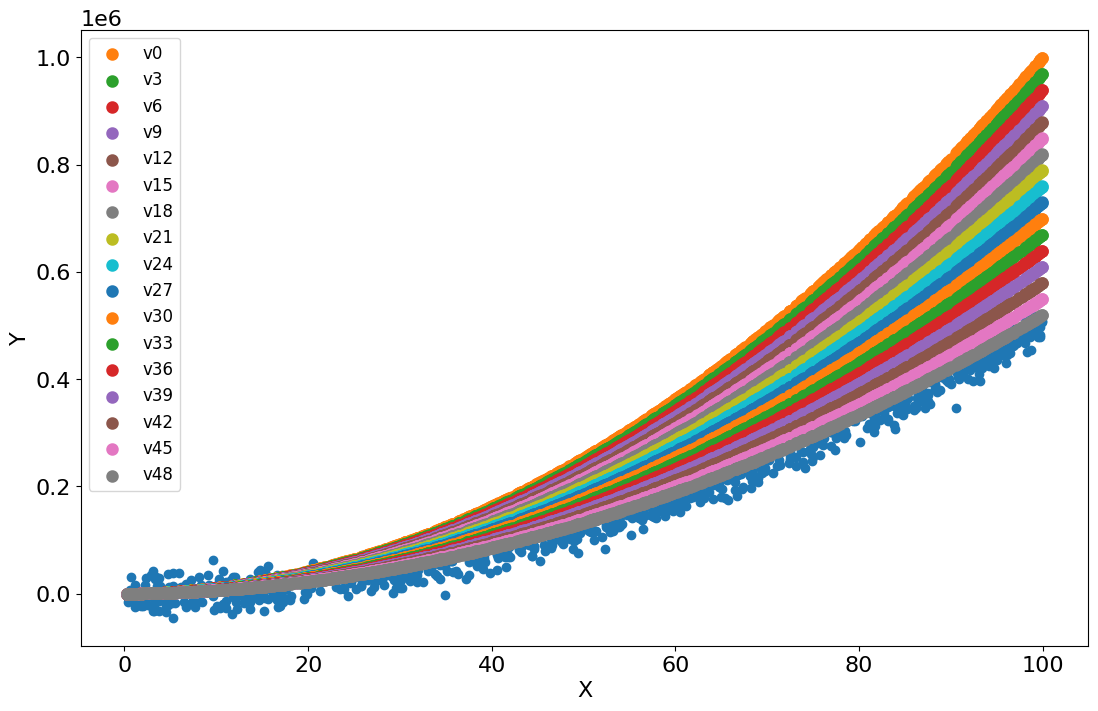

In [220]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs[i][0]*x**2 + update_outputs[i][1]*x + update_outputs[i][2], label='v' + str(i), lw=3)
    plt.legend()

plt.show()

<font size=4 color=red> Pregunta 7: Realiza la gráfica de $W_1$ vs MSE. (HINT: Declara una lista vacía en la que guardes los pesos W1, y otra donde guardes los errores MSE. Estas listas las vas a ir llenando con los valores que guardaste en **update_outputs**. Revisa la clase 2 para que veas cómo se realiza este proceso. Ten cuidado con los índices)

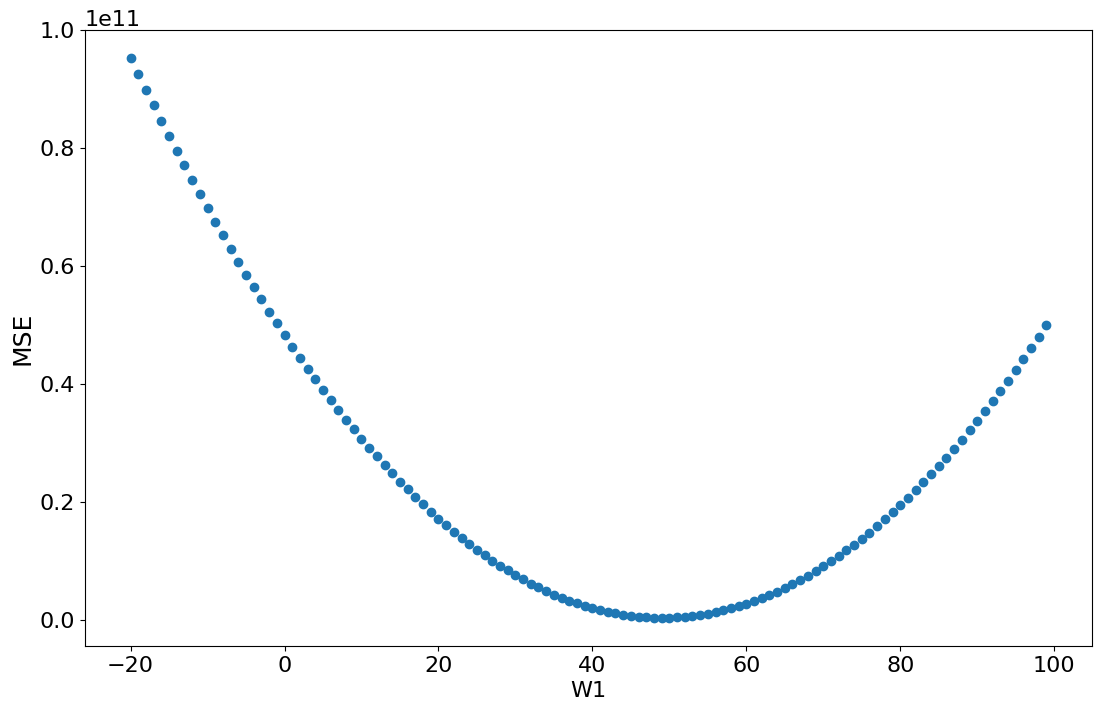

In [221]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W1', fontsize=16)

weights1 = []

mse = []

for update_output in update_outputs:
    
    weights1.append(update_output[0])
    
    mse.append(update_output[4])
    
plt.scatter(weights1, mse)


plt.show()

<font size=4 color=red> Pregunta 8: Señala el error más bajo obtenido, así como los mejores parámetros que llevan a este resultado del error mínimo

In [222]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][4]))

w1_opt = update_outputs[index_min][0]
b_opt = update_outputs[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f} y b = {1:5.2f} ' \
      .format(w1_opt, b_opt))

El MSE mas pequeño tiene el valor: 387494249.74
Los valores optimos de los parámetros son W1 = 49.00 y b = -30.00 


<font size=4 color=red>Pregunta 9: Realiza los mismos procedimientos que desarrollaste en las preguntas 5 a la 8, pero ahora actualizando el valor $W_0$

In [223]:
update_outputs_0 = []

weight1 = 49
weight0 = weight0_0
bias = -30.0
delta_w1 = 0.0
delta_w0 = -10.0 
delta_b = 0.0
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
    
    update_outputs_0.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))

weight1:    49.00   weight0:    90.00   bias: -30.00   MSE: 387809503.82
weight1:    49.00   weight0:   -10.00   bias: -30.00   MSE: 427765588.25
weight1:    49.00   weight0:  -110.00   bias: -30.00   MSE: 534637206.61
weight1:    49.00   weight0:  -210.00   bias: -30.00   MSE: 708424358.88
weight1:    49.00   weight0:  -310.00   bias: -30.00   MSE: 949127045.08
weight1:    49.00   weight0:  -410.00   bias: -30.00   MSE: 1256745265.20
weight1:    49.00   weight0:  -510.00   bias: -30.00   MSE: 1631279019.24
weight1:    49.00   weight0:  -610.00   bias: -30.00   MSE: 2072728307.20
weight1:    49.00   weight0:  -710.00   bias: -30.00   MSE: 2581093129.09
weight1:    49.00   weight0:  -810.00   bias: -30.00   MSE: 3156373484.89
weight1:    49.00   weight0:  -910.00   bias: -30.00   MSE: 3798569374.62
weight1:    49.00   weight0: -1010.00   bias: -30.00   MSE: 4507680798.27


In [224]:
update_outputs_weight_0 = update_outputs_0

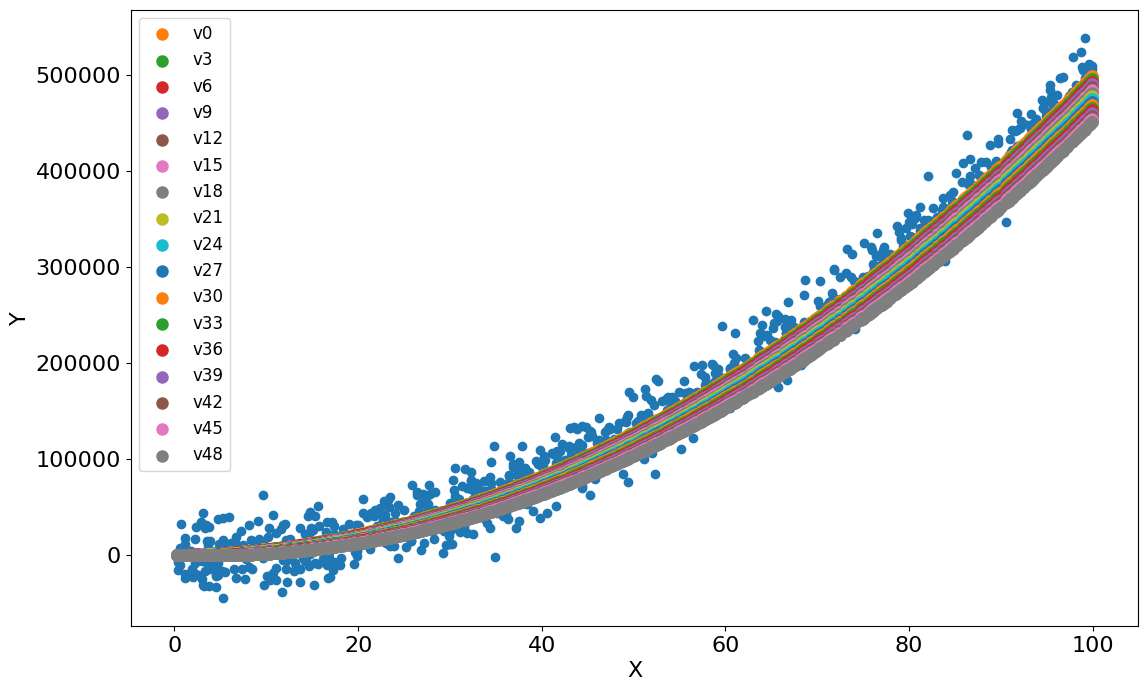

In [225]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs_0[i][0]*x**2 + update_outputs_0[i][1]*x + update_outputs_0[i][2], label='v' + str(i), lw=3)
    plt.legend()

plt.show()

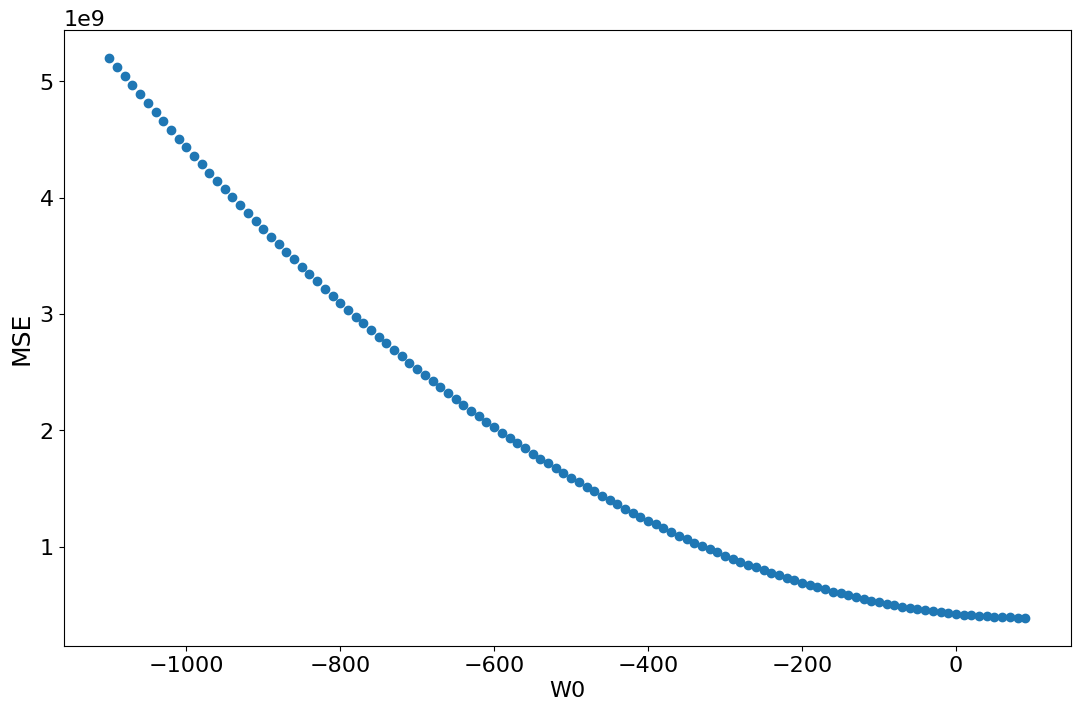

In [226]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W0', fontsize=16)

weights_0 = []

mse_0 = []

for update_output in update_outputs_0:
    
    weights_0.append(update_output[1])
    
    mse_0.append(update_output[4])
    
plt.scatter(weights_0, mse_0)


plt.show()

In [227]:
index_min = np.argmin(mse0)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs_0[index_min][4]))

w0_opt = update_outputs_0[index_min][1]
b_opt = update_outputs_0[index_min][2]

print('Los valores optimos de los parámetros son W0 = {0:5.2f} y b = {1:5.2f} ' \
      .format(w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 387809503.82
Los valores optimos de los parámetros son W0 = 90.00 y b = -30.00 


<font size=4 color=red> Pregunta 10: Repite los pasos marcados en la pregunta 9, pero ahora para actualiza el valor de bias

In [228]:
update_outputs_b = []

weight1 = 49.0
weight0 = 90.0
bias = -300.0
delta_w1 = 0.0
delta_w0 = 0.0 
delta_b = 1.0
iterations = 120

for i in range(iterations):
    
    weight1, weight0, bias, y_, mse = update_weights_biases(x, y, weight1, weight0, bias, delta_w1, delta_w0, delta_b)
    
    update_outputs_b.append([weight1, weight0, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight1: {0:8.2f}   weight0: {1:8.2f}   bias: {2:5.2f}   MSE: {3:10.2f}'.format(weight1, weight0, bias, mse))

weight1:    49.00   weight0:    90.00   bias: -299.00   MSE: 387799293.09
weight1:    49.00   weight0:    90.00   bias: -289.00   MSE: 387797082.67
weight1:    49.00   weight0:    90.00   bias: -279.00   MSE: 387795072.25
weight1:    49.00   weight0:    90.00   bias: -269.00   MSE: 387793261.83
weight1:    49.00   weight0:    90.00   bias: -259.00   MSE: 387791651.41
weight1:    49.00   weight0:    90.00   bias: -249.00   MSE: 387790240.99
weight1:    49.00   weight0:    90.00   bias: -239.00   MSE: 387789030.57
weight1:    49.00   weight0:    90.00   bias: -229.00   MSE: 387788020.16
weight1:    49.00   weight0:    90.00   bias: -219.00   MSE: 387787209.74
weight1:    49.00   weight0:    90.00   bias: -209.00   MSE: 387786599.32
weight1:    49.00   weight0:    90.00   bias: -199.00   MSE: 387786188.90
weight1:    49.00   weight0:    90.00   bias: -189.00   MSE: 387785978.48


In [229]:
update_outputs_weight_b = update_outputs_b

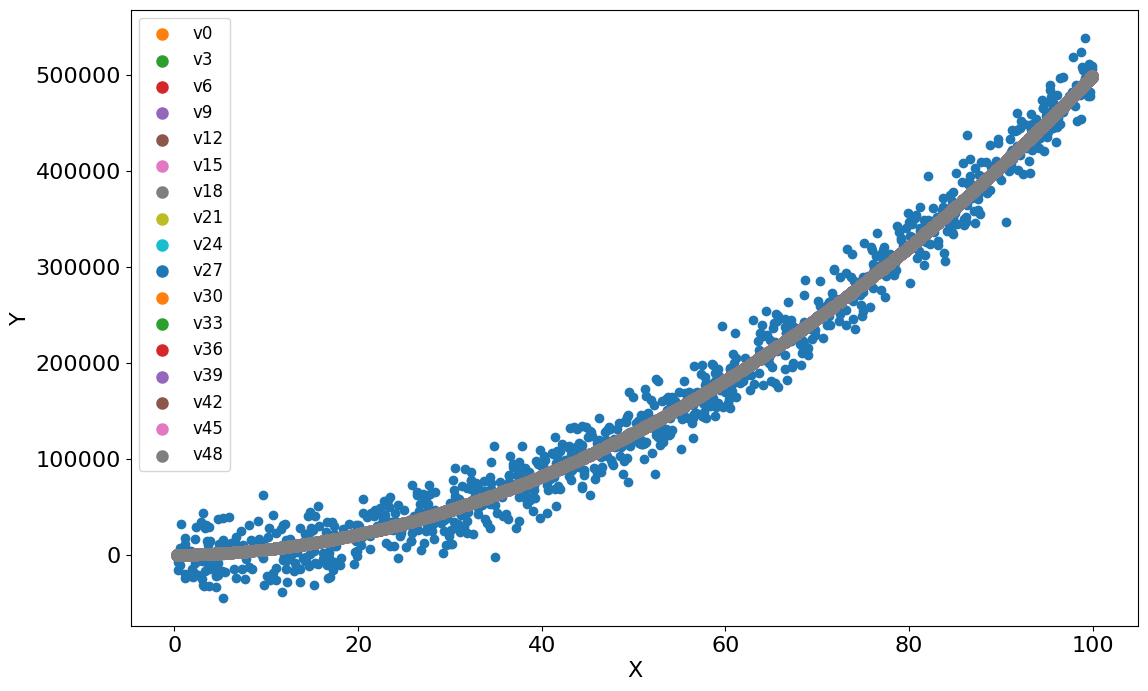

In [230]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

plt.scatter(x, y)

for i in range(0,50,3):

    plt.scatter(x, update_outputs_b[i][0]*x**2 + update_outputs_b[i][1]*x + update_outputs_b[i][2], label='v' + str(i), lw=3)
    plt.legend()

plt.show()

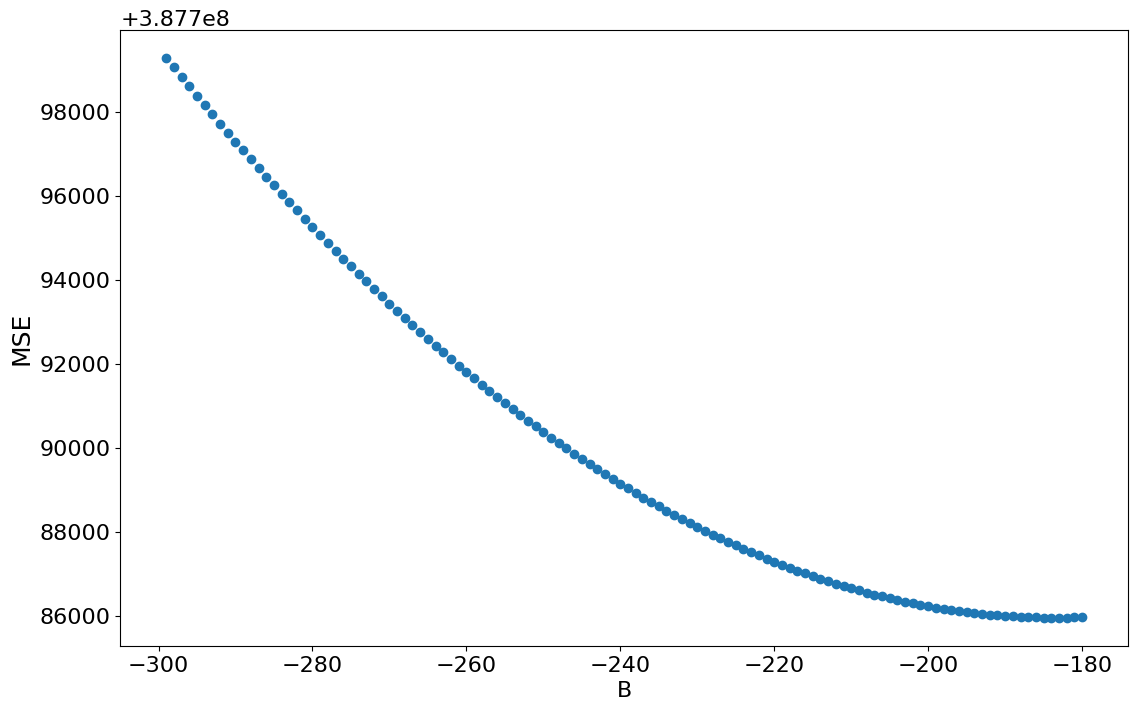

In [231]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('B', fontsize=16)

bias = []

mse_b = []

for update_output in update_outputs_b:
    
    bias.append(update_output[2])
    
    mse_b.append(update_output[4])
    
plt.scatter(bias, mse_b)


plt.show()

In [232]:
index_min = np.argmin(mse_b)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs_b[index_min][4]))

w1_opt = update_outputs_b[index_min][0]
w0_opt = update_outputs_b[index_min][1]
b_opt = update_outputs_b[index_min][2]

print('Los valores optimos de los parámetros son W1 = {0:5.2f}, W0 = {1:5.2f} y b = {2:5.2f} ' \
      .format(w1_opt, w0_opt, b_opt))

El MSE mas pequeño tiene el valor: 387785948.23
Los valores optimos de los parámetros son W1 = 49.00, W0 = 90.00 y b = -183.00 


<font size=4 color=red>Pregunta Extra: ¿Qué representa físicamente el valor $W_1$? ¿El ajuste que realizaste se acerca al valor que se indica como referencia? ¿Por qué? 

El valor del primer peso representa un medio de la aceleración del objeto que experimenta el movimiento uniformemente acelerado al deslizar por el plano inclinado.